#Self Organizing Map

**Introduction:**

In this project, we will be finding out potential frauds or anomalies in a bank dataset on Credit Cards Applications. The goal is to unearth which clients could be potential fraudsters, which the bank could later go and investigate further.

SOMs or Self-Organizing Maps are unsupervised DL algorithms that help in finding patterns within the dataset, much like how the K-Means clustering algorithm does in machine learning.

Here, we have used SOMs for identifying potential anomalies in the dataset.

**IMPORTANT NOTE:**

This dataset is relatively small, therefore with each re-run, the SOM would identify different anomalies. This is therefore, just for learning and working purposes. SOMs work best on big datasets, wherein the variations would be much lesser and the results consistent across several re-runs.
This project is therefore just for learning and illustrative purposes on how SOMs work in general.



##Install MiniSom Package

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=ae51330982889630d4d08870d6e2b289df2f3106f7b28e796dc59aa9cc25ea0d
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset

dataset = pd.read_csv("/content/drive/MyDrive/Credit_Card_Applications.csv")
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
# We will create two subsets of data

X = dataset.iloc[:, :-1].values # All columns except Class Column
y = dataset.iloc[:, -1].values  # Just the "Class column"

In [6]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [7]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

## Feature Scaling


In [8]:
# We will use Normalisation

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

##Training the SOM


In [9]:
from minisom import MiniSom

In [11]:
# Creating an instance of the MiniSom class

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [12]:
# Now we will initialize the weights at random

som.random_weights_init(X)

In [13]:
# Now we will train the SOM

som.train_random(data=X, num_iteration=100)

##Visualizing the results


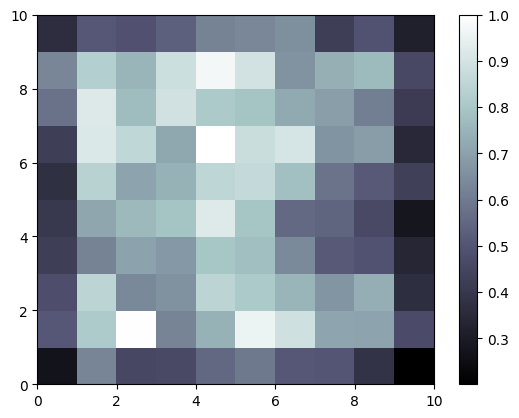

In [14]:
from pylab import bone, pcolor, colorbar, plot, show

bone()  # skeleton of the map
pcolor(som.distance_map().T)  # this will create colors for different MIDs (mean interneuron distances - will create a matrix for this)
colorbar()  # to find what color corresponds to what MID - this will give a legend

This map shows that white coloured boxes are high MID boxes where frauds are occuring. Darkest colours are good non-fraudulent customers.

Now we have to check if fraudulent customers have been approved / not approved.

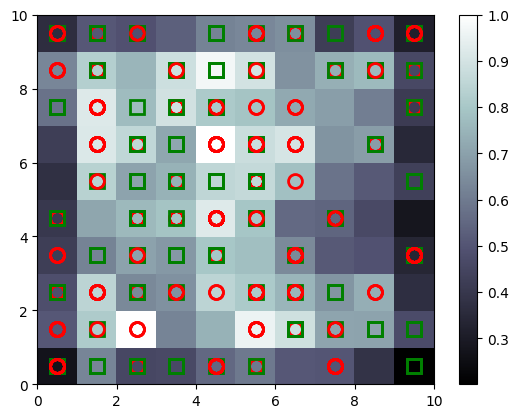

In [16]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


## Finding the frauds


In [21]:
mappings = som.win_map(X) # creates a dictionary of mapped customers

# Finding the frauds

frauds = np.concatenate((mappings[(5,2)], mappings[(9,3)]), axis=0)

# Inversing the scaling to get the actual values
frauds = sc.inverse_transform(frauds)

##Printing the Fraudulent Clients

In [22]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15605791
15571415
15565714
15565996
15644400
15581871
15617065
15588019
15575146
15599440
15655658
15597709
15681755
15642934
15636767
15615832
15690772
15594812
15681509
15603683
15643056
15659100
15591010
15713983
15709252
15701885
15596165
15690153
15632503
15648681
15724851
15587266
15567860
15702149
15689786
15711635
15670646
15666012
15716347
15625311
15673747
15676156
15604130
15740411
15668889
15657228
15686913
15575430
15590234
15569917
15642448
15620832
15624423
15673238
15604196
15613673
15679622
15711977
